## 1) Delivery_time -> Predict delivery time using sorting time 


## Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import metrics

In [2]:
#import data
D_data=pd.read_csv('delivery_time.csv')
D_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## EDA  and Visulization for dataset


In [3]:
D_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
D_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

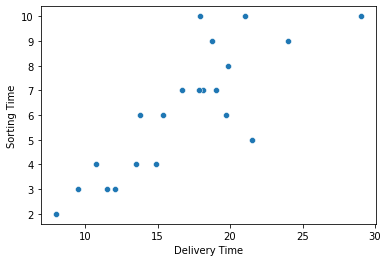

In [5]:
sns.scatterplot(x=D_data['Delivery Time'],y=D_data['Sorting Time'])

## Increase in shorting time leads to increase in delivery time

In [6]:
# Renaming Columns
D_data=D_data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
D_data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## Correlation 

In [7]:
D_data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


## Their is a strong correlation  

C:\Users\hmaca\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

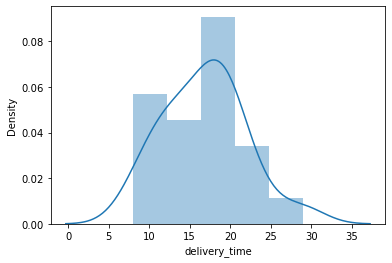

In [8]:
sns.distplot(D_data['delivery_time'])

C:\Users\hmaca\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

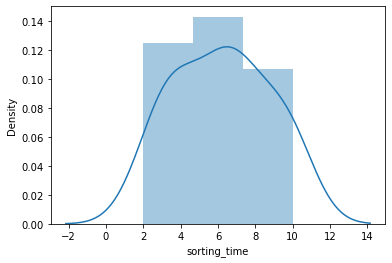

In [9]:
sns.distplot(D_data['sorting_time'])

## their is no outlier are present in dataset

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

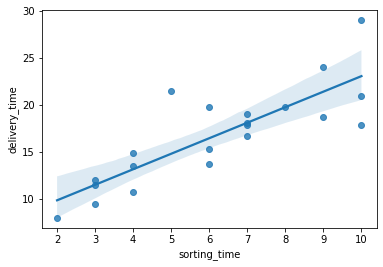

In [10]:
sns.regplot(x="sorting_time",y="delivery_time",  data=D_data)


# Fitting Linear Regression Model

In [11]:
model=smf.ols('delivery_time~sorting_time', data=D_data).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           3.98e-06
Time:                        05:25:00   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [14]:
print(model.tvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64


In [15]:
print(model.pvalues)

Intercept       0.001147
sorting_time    0.000004
dtype: float64


## Prediction for dataset

In [16]:
predicted_time = model.predict(D_data.sorting_time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : D_data.delivery_time, 'Delivery_Time_Predicted' : predicted_time})
pred_df.head()

,Delivery_Time_Actual,Delivery_Time_Predicted
0,21.00,23.072933
1,13.50,13.178814
2,19.75,16.476853
3,24.00,21.423913
4,29.00,23.072933


## Error calculation

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(D_data.delivery_time, predicted_time))  
print('Mean Squared Error:', metrics.mean_squared_error(D_data.delivery_time, predicted_time))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(D_data.delivery_time, predicted_time)))

Mean Absolute Error: 2.0857409551882653
Mean Squared Error: 7.793311548584063
Root Mean Squared Error: 2.7916503270617654


## Building Model with log transformation 

In [18]:
D_data1 = pd.DataFrame.copy(D_data)
D_data1['log_sorting_time'] = np.log(D_data1.sorting_time)
D_data1.head()

,delivery_time,sorting_time,log_sorting_time
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585


C:\Users\hmaca\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_sorting_time', ylabel='Density'>

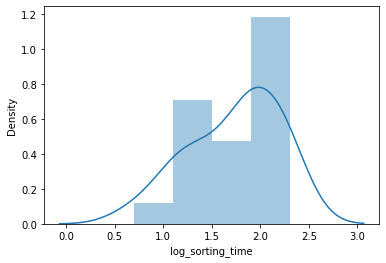

In [19]:
sns.distplot(D_data1['log_sorting_time'])

In [20]:
#fitting model
log_model=smf.ols('delivery_time~log_sorting_time', data=D_data1).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           2.64e-06
Time:                        05:25:01   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455      0.472      0.642      -3.978       6.297
log_sorting_time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#predict log value
log_predict_time=log_model.predict(D_data1.log_sorting_time)
log_pred_df = pd.DataFrame({'Delivery_Time_Actual' : D_data1.delivery_time, 'log_Delivery_Time_Predicted' : log_predict_time})
log_pred_df.head(10)

,Delivery_Time_Actual,log_Delivery_Time_Predicted
0,21.00,21.982913
1,13.50,13.696517
2,19.75,17.363305
3,24.00,21.030094
4,29.00,21.982913
5,15.35,17.363305
6,19.00,18.757354
7,9.50,11.094889
8,17.90,21.982913
9,18.75,21.030094


In [22]:
#error calculation
print('Mean Absolute Error:', metrics.mean_absolute_error(D_data1.delivery_time, log_predict_time))  
print('Mean Squared Error:', metrics.mean_squared_error(D_data1.delivery_time, log_predict_time))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(D_data1.delivery_time, log_predict_time)))

Mean Absolute Error: 2.0473757067928995
Mean Squared Error: 7.470226320948425
Root Mean Squared Error: 2.733171476682066


## Building Model with square root transfarmation

In [23]:
D_data2=pd.DataFrame.copy(D_data)
D_data2['sqrt_sorting_time']=np.sqrt(D_data2.sorting_time)
D_data2.head()

,delivery_time,sorting_time,sqrt_sorting_time
0,21.00,10,3.162278
1,13.50,4,2.000000
2,19.75,6,2.449490
3,24.00,9,3.000000
4,29.00,10,3.162278


C:\Users\hmaca\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqrt_sorting_time', ylabel='Density'>

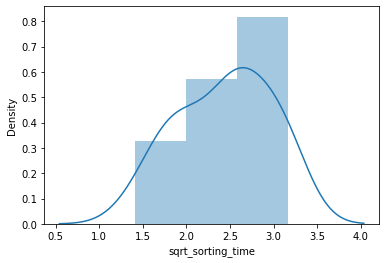

In [24]:
sns.distplot(D_data2['sqrt_sorting_time'])

In [25]:
sqrt_model=smf.ols('delivery_time~sqrt_sorting_time',data=D_data2).fit()
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           2.61e-06
Time:                        05:25:02   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.5188      2.995     -0.841      0.411      -8.788       3.751
sqrt_sorting_time     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#predicting square root value
sqrt_predict=sqrt_model.predict(D_data2.sqrt_sorting_time)
sqrt_pred=pd.DataFrame({'Actual_delivery_time':D_data2.delivery_time,'sqrt_delivery_time':sqrt_predict})
sqrt_pred.head()

,Actual_delivery_time,sqrt_delivery_time
0,21.00,22.578867
1,13.50,13.354345
2,19.75,16.921761
3,24.00,21.290936
4,29.00,22.578867


In [27]:
#error calculation
print("Mean Absolute Error:", metrics.mean_absolute_error(D_data2.delivery_time,sqrt_predict))
print("Mean Squared Error:", metrics.mean_squared_error(D_data2.delivery_time, sqrt_predict))  
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(D_data2.delivery_time, sqrt_predict)))


Mean Absolute Error: 2.047327080280359
Mean Squared Error: 7.461328308595395
Root Mean Squared Error: 2.7315432100912105


## Building Mdodel with Exponential Transformation

In [28]:
D_data3=pd.DataFrame.copy(D_data)
D_data3['exp_sorting_time']=np.exp(D_data3.sorting_time)
D_data3.head()

,delivery_time,sorting_time,exp_sorting_time
0,21.00,10,22026.465795
1,13.50,4,54.598150
2,19.75,6,403.428793
3,24.00,9,8103.083928
4,29.00,10,22026.465795


C:\Users\hmaca\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='exp_sorting_time', ylabel='Density'>

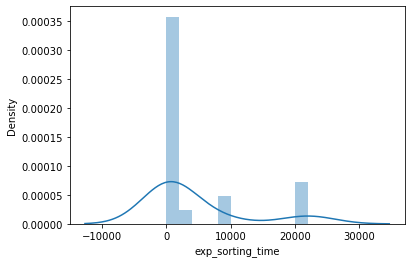

In [29]:
sns.distplot(D_data3['exp_sorting_time'])

In [30]:
exp_model=smf.ols('delivery_time~exp_sorting_time',data=D_data3).fit()
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Sat, 11 Jun 2022   Prob (F-statistic):            0.00396
Time:                        05:25:02   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           15.0836      1.047     14.406      0.000      12.892      17.275
exp_sorting_time     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
exp_predict=exp_model.predict(D_data3.exp_sorting_time)
exp_pred=pd.DataFrame({'Actual_delivery_time':D_data3.delivery_time,'exp_delivery_time':exp_predict})
exp_pred.head()

,Actual_delivery_time,exp_delivery_time
0,21.00,23.739082
1,13.50,15.105033
2,19.75,15.242109
3,24.00,18.267760
4,29.00,23.739082


In [32]:
#error calculation
print("Mean Absolute Error:", metrics.mean_absolute_error(D_data3.delivery_time,exp_predict))
print("Mean Squared Error:", metrics.mean_squared_error(D_data3.delivery_time, exp_predict))  
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(D_data3.delivery_time, exp_predict)))


Mean Absolute Error: 3.3891682546942556
Mean Squared Error: 15.670638280266925
Root Mean Squared Error: 3.958615702523664


## Building Model with square of transformation

In [33]:
D_data4=pd.DataFrame.copy(D_data)
D_data4['sqre_sorting_time']=(D_data4.sorting_time)**2
D_data4.head()

,delivery_time,sorting_time,sqre_sorting_time
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100


C:\Users\hmaca\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqre_sorting_time', ylabel='Density'>

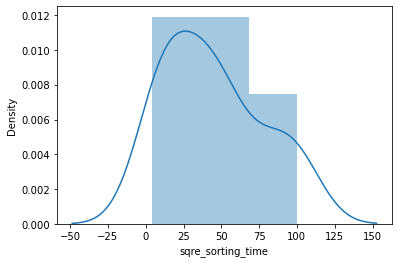

In [34]:
sns.distplot(D_data4['sqre_sorting_time'])

In [35]:
sqre_model=smf.ols('delivery_time~sqre_sorting_time',data=D_data4).fit()
sqre_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           1.74e-05
Time:                        05:25:03   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            11.2372      1.196      9.399      0.000       8.735      13.740
sqre_sorting_time     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
sqre_predict=sqre_model.predict(D_data4.sqre_sorting_time)
sqre_pred=pd.DataFrame({'Actual_delivery_time':D_data4.delivery_time,'sqre_delivery_time':sqre_predict})
sqre_pred.head()

,Actual_delivery_time,sqre_delivery_time
0,21.00,23.724217
1,13.50,13.235127
2,19.75,15.732529
3,24.00,21.351685
4,29.00,23.724217


In [37]:
#error calculation
print("Mean Absolute Error:", metrics.mean_absolute_error(D_data4.delivery_time,sqre_predict))
print("Mean Squared Error:", metrics.mean_squared_error(D_data4.delivery_time, sqre_predict))  
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(D_data4.delivery_time, sqre_predict)))

Mean Absolute Error: 2.3300895671021413
Mean Squared Error: 9.068393138438145
Root Mean Squared Error: 3.0113772826462886


In [38]:
model_data={'Prep_Models':['Model','log_Model','sqrt_Model','exp_model','sqre_model'],'Rsquared':[model.rsquared,log_model.rsquared,sqrt_model.rsquared,exp_model.rsquared,sqre_model.rsquared]}
table=pd.DataFrame(model_data)
table

,Prep_Models,Rsquared
0,Model,0.682271
1,log_Model,0.695443
2,sqrt_Model,0.695806
3,exp_model,0.361118
4,sqre_model,0.630287


## As we show that square root transformation is higest R_squared value so we chose that model

### Prediction for new data points through squared root model

In [39]:
new_data=pd.Series([3,7,22])
new_data

0     3
1     7
2    22
dtype: int64

In [40]:
data_pred=pd.DataFrame(np.sqrt(new_data),columns=['sqrt_sorting_time'])

data_pred

,sqrt_sorting_time
0,1.732051
1,2.645751
2,4.690416


In [41]:
sqrt_model.predict(data_pred)

0    11.227742
1    18.479409
2    34.707074
dtype: float64